# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | yerofey pavlovich
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | trancas
Processing Record 8 of Set 1 | puerto deseado
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | bardai
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | saipan
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | alotau
City not found. Skipping...
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | remire-montjoly
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of

Processing Record 38 of Set 4 | pompeia
Processing Record 39 of Set 4 | taiohae
City not found. Skipping...
Processing Record 40 of Set 4 | santana
Processing Record 41 of Set 4 | broome
Processing Record 42 of Set 4 | howard springs
Processing Record 43 of Set 4 | daru
Processing Record 44 of Set 4 | umea
Processing Record 45 of Set 4 | ayr
Processing Record 46 of Set 4 | villa hidalgo
Processing Record 47 of Set 4 | ust-nera
Processing Record 48 of Set 4 | kudahuvadhoo
Processing Record 49 of Set 4 | katsuren-haebaru
Processing Record 0 of Set 5 | mount darwin
Processing Record 1 of Set 5 | constantia
Processing Record 2 of Set 5 | lydenburg
Processing Record 3 of Set 5 | cadillac
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | at taj
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | jiagedaqi
Processing Record 8 of Set 5 | muzaffarnagar
Processing Record 9 of Set 5 | kone
Processing Record 10 of Set 5 | weyburn
Processing Record 11 of Set 5 

Processing Record 30 of Set 8 | inarajan village
Processing Record 31 of Set 8 | belalcazar
Processing Record 32 of Set 8 | chonchi
Processing Record 33 of Set 8 | governor's harbour
City not found. Skipping...
Processing Record 34 of Set 8 | mbaiki
Processing Record 35 of Set 8 | bununu
Processing Record 36 of Set 8 | mar del plata
Processing Record 37 of Set 8 | pajok
Processing Record 38 of Set 8 | yagry
City not found. Skipping...
Processing Record 39 of Set 8 | callao
Processing Record 40 of Set 8 | san pedro pochutla
Processing Record 41 of Set 8 | nelson bay
Processing Record 42 of Set 8 | pitimbu
Processing Record 43 of Set 8 | yuzhno-kurilsk
Processing Record 44 of Set 8 | nar'yan-mar
Processing Record 45 of Set 8 | sao geraldo do araguaia
Processing Record 46 of Set 8 | khromtau
Processing Record 47 of Set 8 | maroua
Processing Record 48 of Set 8 | petawawa
Processing Record 49 of Set 8 | onguday
Processing Record 0 of Set 9 | sanya
Processing Record 1 of Set 9 | sterling
Pro

Processing Record 21 of Set 12 | road town
Processing Record 22 of Set 12 | papao
Processing Record 23 of Set 12 | nova xavantina
Processing Record 24 of Set 12 | codrington
Processing Record 25 of Set 12 | el granada
Processing Record 26 of Set 12 | thies nones
Processing Record 27 of Set 12 | kavaratti
Processing Record 28 of Set 12 | gebeit
Processing Record 29 of Set 12 | copala
Processing Record 30 of Set 12 | plesetsk
Processing Record 31 of Set 12 | fisterra
Processing Record 32 of Set 12 | suda
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-9.71,92,100,4.12,CA,Wed Jan 31 19:45:21 2024
1,ushuaia,-54.8000,-68.3000,7.81,81,0,4.63,AR,Wed Jan 31 19:45:22 2024
2,grytviken,-54.2811,-36.5092,5.02,66,80,3.92,GS,Wed Jan 31 19:45:22 2024
3,yerofey pavlovich,53.9667,121.9667,-15.79,65,29,1.58,RU,Wed Jan 31 19:45:22 2024
4,waitangi,-43.9535,-176.5597,18.79,98,100,0.45,NZ,Wed Jan 31 19:45:22 2024


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-9.71,92,100,4.12,CA,Wed Jan 31 19:45:21 2024
1,ushuaia,-54.8000,-68.3000,7.81,81,0,4.63,AR,Wed Jan 31 19:45:22 2024
2,grytviken,-54.2811,-36.5092,5.02,66,80,3.92,GS,Wed Jan 31 19:45:22 2024
3,yerofey pavlovich,53.9667,121.9667,-15.79,65,29,1.58,RU,Wed Jan 31 19:45:22 2024
4,waitangi,-43.9535,-176.5597,18.79,98,100,0.45,NZ,Wed Jan 31 19:45:22 2024


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

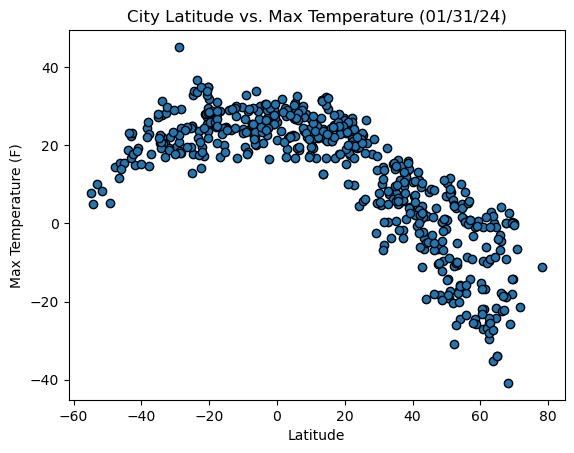

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

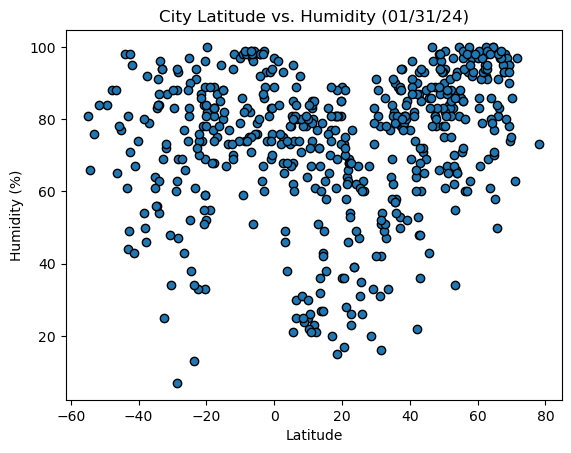

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

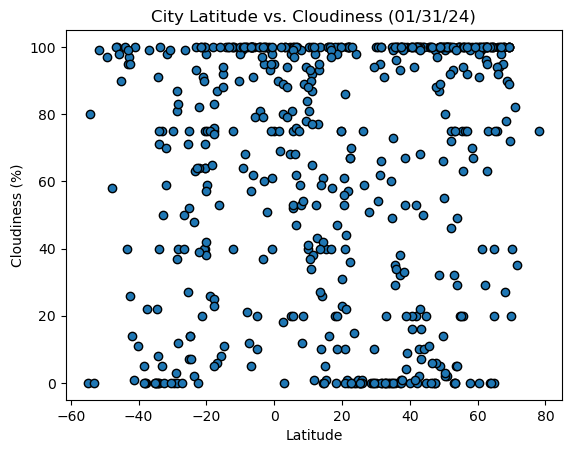

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

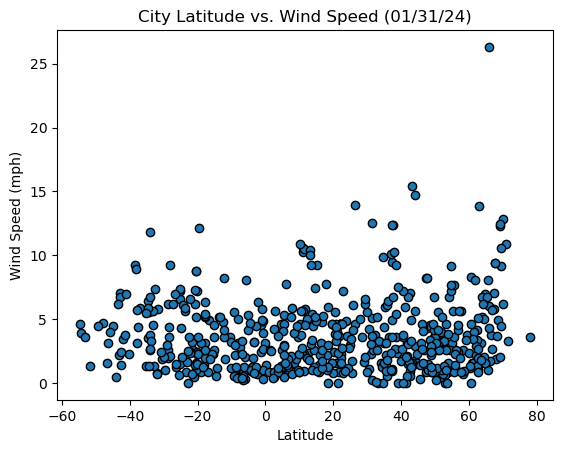

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
# Perform linear regression
def perform_linear_regression(x_values, y_values, title, x_label, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values, marker="o", edgecolors="black")
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=12, color="red")
    plt.title(title)
    plt.grid()
    plt.ylabel(title)
    plt.xlabel('Latitude')
    

    plt.show()

  

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-9.71,92,100,4.12,CA,Wed Jan 31 19:45:21 2024
3,yerofey pavlovich,53.9667,121.9667,-15.79,65,29,1.58,RU,Wed Jan 31 19:45:22 2024
8,petropavlovsk-kamchatsky,53.0452,158.6483,-10.67,62,75,2.68,RU,Wed Jan 31 19:45:22 2024
9,bardai,11.6500,7.2333,16.78,23,1,5.78,NG,Wed Jan 31 19:45:23 2024
11,saipan,15.1355,145.7010,29.39,58,40,9.26,MP,Wed Jan 31 19:45:23 2024


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,7.81,81,0,4.63,AR,Wed Jan 31 19:45:22 2024
2,grytviken,-54.2811,-36.5092,5.02,66,80,3.92,GS,Wed Jan 31 19:45:22 2024
4,waitangi,-43.9535,-176.5597,18.79,98,100,0.45,NZ,Wed Jan 31 19:45:22 2024
5,adamstown,-25.0660,-130.1015,24.96,81,7,6.56,PN,Wed Jan 31 19:45:22 2024
6,trancas,-26.2314,-65.2803,24.35,66,99,1.28,AR,Wed Jan 31 19:45:22 2024


###  Temperature vs. Latitude Linear Regression Plot

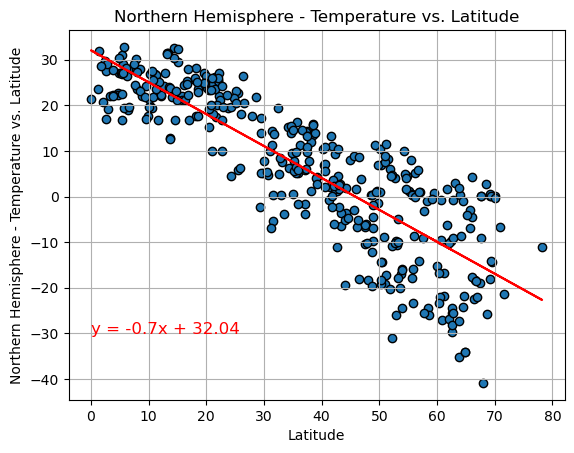

In [20]:
# Linear regression on Northern Hemisphere
perform_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                           "Northern Hemisphere - Temperature vs. Latitude",
                           "Latitude", "Temperature (C)", (0, -30))

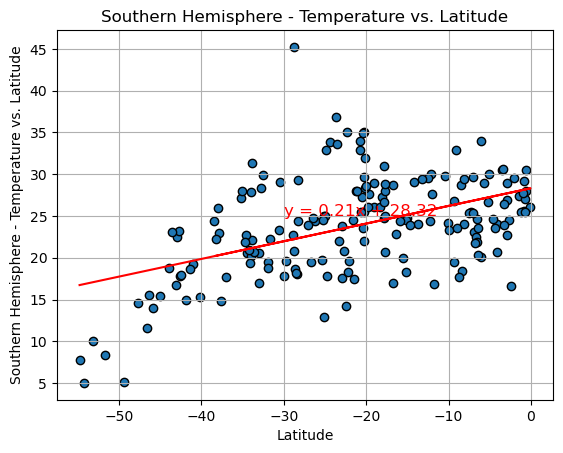

In [23]:
# Linear regression on Southern Hemisphere
perform_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                           "Southern Hemisphere - Temperature vs. Latitude",
                           "Latitude", "Temperature (C)", (-30, 25))

**Discussion about the linear relationship:** There appears to be a reversal of relationship between temperature and latitude from the Northern Hemisphere to the Southern Hemisphere. Thy both show a correlation between the two.

### Humidity vs. Latitude Linear Regression Plot

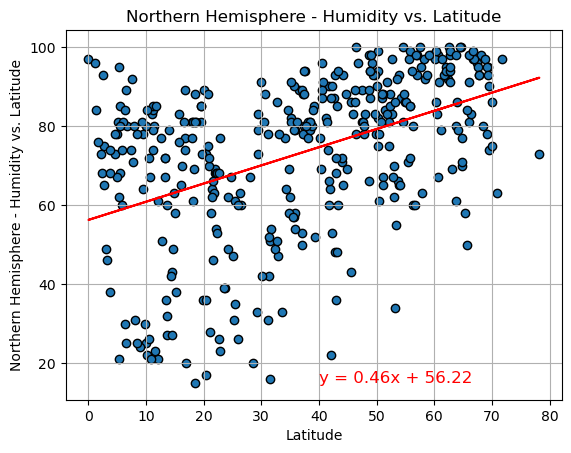

In [22]:
# Northern Hemisphere
perform_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                           "Northern Hemisphere - Humidity vs. Latitude",
                           "Latitude", "Humidity (%)", (40, 15))

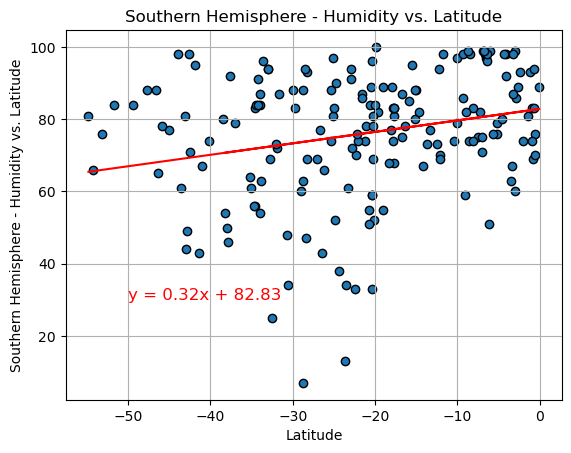

In [24]:
# Southern Hemisphere
perform_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                           "Southern Hemisphere - Humidity vs. Latitude",
                           "Latitude", "Humidity (%)", (-50, 30))

**Discussion about the linear relationship:** Humidity and Latitude have similar relationship corellations on both the Southern and Northern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

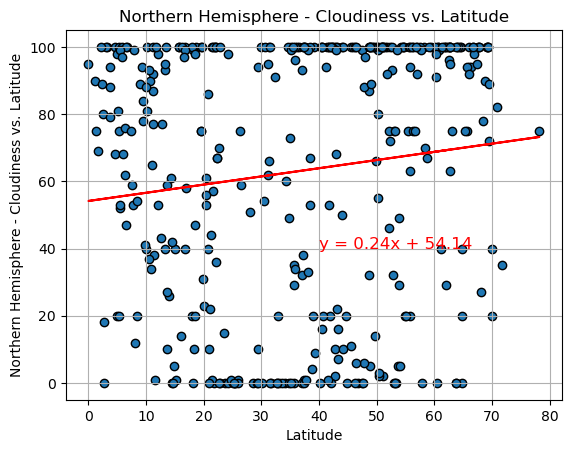

In [25]:
# Northern Hemisphere
perform_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                           "Northern Hemisphere - Cloudiness vs. Latitude",
                           "Latitude", "Cloudiness (%)", (40, 40))

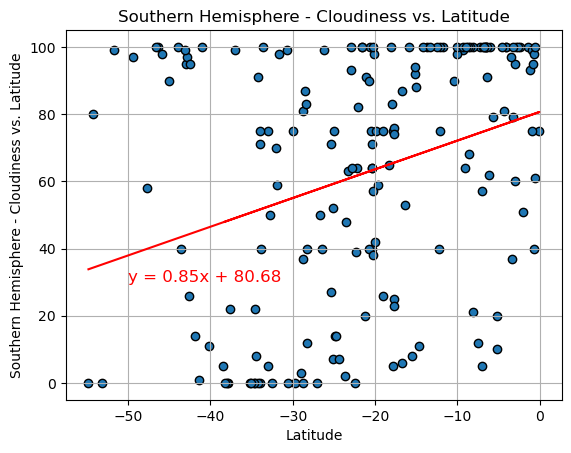

In [26]:
# Southern Hemisphere
perform_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                           "Southern Hemisphere - Cloudiness vs. Latitude",
                           "Latitude", "Cloudiness (%)", (-50, 30))

**Discussion about the linear relationship:** Cloudiness and latitiude appear to be linked in both hemispheres with the Southern Hemisphere being stronger. 

### Wind Speed vs. Latitude Linear Regression Plot

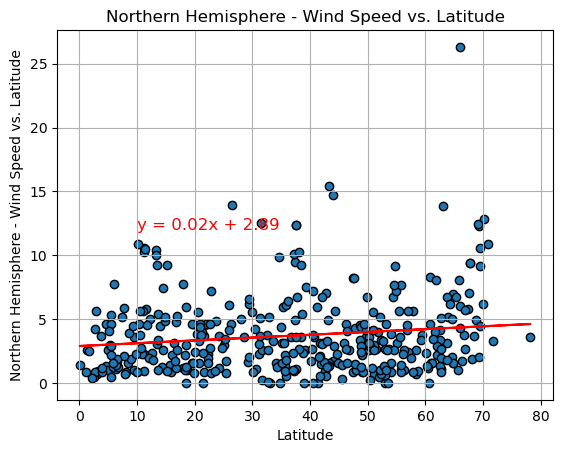

In [27]:
# Northern Hemisphere
perform_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                           "Northern Hemisphere - Wind Speed vs. Latitude",
                           "Latitude", "Wind Speed (m/s)", (10, 12))

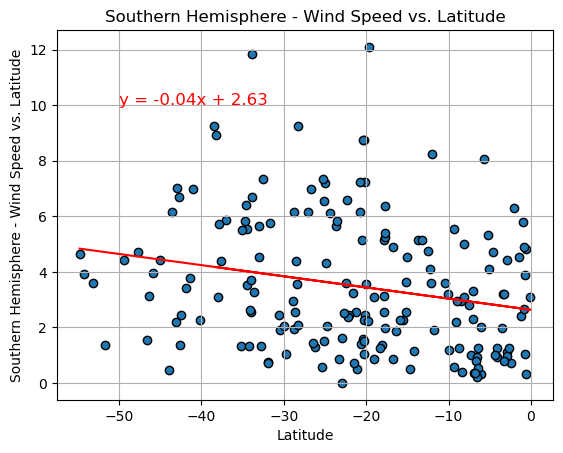

In [28]:
# Southern Hemisphere
perform_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                           "Southern Hemisphere - Wind Speed vs. Latitude",
                           "Latitude", "Wind Speed (m/s)", (-50, 10))

**Discussion about the linear relationship:** The relationship between latitude and wind is very weak and not significant  for either hemisphere. 